In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import functions as f
import easygui as gui
import ipywidgets as widgets
from skimage.feature import peak_local_max
from scipy import ndimage
get_ipython().run_line_magic('matplotlib', 'notebook')
#%matplotlib widget

files = gui.fileopenbox(default='/media/erick/NuevoVol/LINUX_LAP/PhD/Thesis/Results/', multiple=True)

path = [[],[]]
if files[0].find('MED') != -1:
    path[0] = files[1]
    path[1] = files[0]
else:
    path = files

In [2]:
I =mpimg.imread(path[0]) 
I_MEDIAN = mpimg.imread(path[1])
#I_MEDIAN = np.ones((np.shape(I)[0], np.shape(I)[1]))

N = 1.3226
LAMBDA = 0.642               # Diode
MPP = 20                      # Magnification: 10x, 20x, 50x, etc
FS = 0.711*(MPP/10)                     # Sampling Frequency px/um
NI = np.shape(I)[0]
NJ = np.shape(I)[1]
SZ = 2.5                       # Step size in um
NUMSTEPS = 80

RS = f.rayleighSommerfeldPropagator(I, I_MEDIAN, N, LAMBDA, FS, SZ, NUMSTEPS, True, True)
GS = f.zGradientStack(RS)

<IPython.core.display.Javascript object>


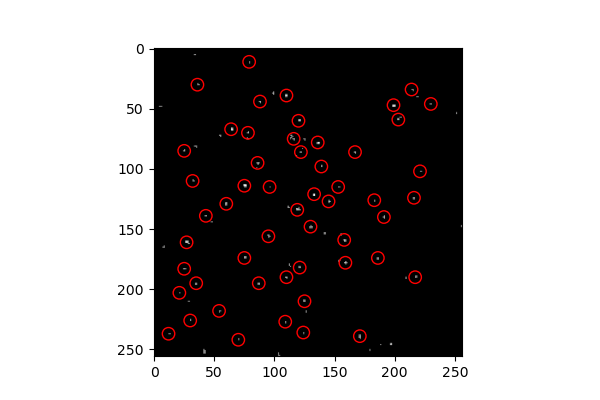

interactive(children=(FloatSlider(value=0.0, description='threshold', max=1.0, step=0.05), IntSlider(value=30,…

In [3]:
# set up plot
fig, ax = plt.subplots(figsize=(6, 4)) 
 
 
@widgets.interact(threshold=(0, 1, 0.05), peak_min_dist=(0, 50, 5), show_scatter = False)
def update(threshold=np.min(GS.flatten()), peak_min_dist=30, show_scatter=True):
    GSS = np.copy(GS)
    GSS[GS < threshold] = 0
    ZP = np.max(GSS, axis=-1)
    PKS = peak_local_max(ZP, min_distance=peak_min_dist)
    ax.clear()
    ax.imshow(ZP, cmap='gray')
    if show_scatter==True:
        ax.scatter(PKS[:,1], PKS[:,0], marker='o', facecolors='none', s=80, edgecolors='r')


<IPython.core.display.Javascript object>


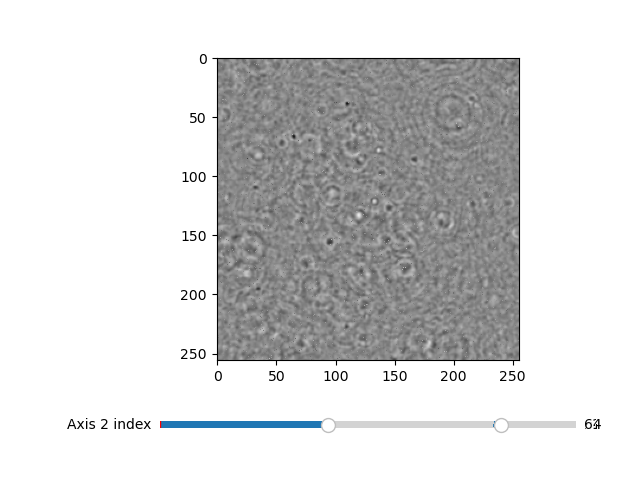

In [4]:
f.imshow_slider(RS, 2, 'gray')